In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Data Pre-processing

## 1.0 Load dataset

In [2]:
df_train = pd.read_csv('dataset/train_yutong.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25718 entries, 0 to 25717
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          25718 non-null  int64  
 1   listing_id          25718 non-null  int64  
 2   name                25718 non-null  object 
 3   street              25718 non-null  object 
 4   type                25718 non-null  object 
 5   bathrooms           24484 non-null  float64
 6   district            25718 non-null  int64  
 7   region              25718 non-null  object 
 8   planning_area       25718 non-null  object 
 9   subszone            25718 non-null  object 
 10  built_year          25645 non-null  float64
 11  no_of_units         24680 non-null  float64
 12  area_size           25718 non-null  float64
 13  date_listed         25718 non-null  object 
 14  price               25718 non-null  float64
 15  bedrooms            25718 non-null  float64
 16  tenu

In [4]:
df_train.head()

,Unnamed: 0,listing_id,name,street,type,bathrooms,district,region,planning_area,subszone,...,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
0,0,6998418,seascape,57 cove way,condominium,4.0,4,central region,southern islands,sentosa,...,6,2.739930,0,1,2.511796,0,3,2.110841,0,7
1,1,2046604,la maison,10 moulmein rise,apartment,3.0,11,central region,novena,moulmein,...,70,0.786247,3,27,0.145587,7,35,0.230193,5,53
2,2,7563513,viva,2 suffolk walk,condominium,3.0,11,central region,novena,moulmein,...,70,0.668196,1,28,0.182761,7,34,0.331496,5,50
3,3,3071445,urban treasures,205 jalan eunos,condominium,2.0,14,east region,bedok,kaki bukit,...,25,0.308054,1,30,0.300643,4,33,0.426680,5,24
4,4,9667539,infini at east coast,east coast road,apartment,3.0,15,east region,bedok,frankel,...,18,0.388370,3,20,0.232984,6,22,0.822432,2,18


In [5]:
df_train.describe()

,Unnamed: 0,listing_id,bathrooms,district,built_year,no_of_units,area_size,price,bedrooms,tenure_remains,...,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
count,25718.000000,2.571800e+04,24484.000000,25718.000000,25645.000000,24680.000000,25718.000000,2.571800e+04,25718.000000,25718.000000,...,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000,25718.000000
mean,12858.500000,5.495814e+06,2.281000,12.212497,1995.159524,461.681483,1251.166343,3.003332e+06,2.566879,380276.113889,...,41.989579,0.605690,2.800451,19.775138,0.481503,3.754024,25.373318,0.410230,4.955984,31.333541
std,7424.291448,2.607456e+06,1.146691,7.011785,33.875646,423.024212,1067.453284,4.340523e+06,1.143536,485386.342802,...,24.588214,0.414985,2.118362,7.724840,0.340616,2.441141,9.615606,0.328124,3.867986,13.351714
min,0.000000,1.000122e+06,1.000000,1.000000,1910.000000,4.000000,323.000000,5.566000e+05,0.000000,0.000000,...,4.000000,0.014425,0.000000,1.000000,0.008718,0.000000,3.000000,0.000051,0.000000,4.000000
25%,6429.250000,3.227969e+06,1.000000,7.000000,1985.000000,130.000000,689.000000,1.342000e+06,2.000000,99.000000,...,18.000000,0.319962,1.000000,15.000000,0.270678,2.000000,19.000000,0.178788,2.000000,20.000000
50%,12858.500000,5.489918e+06,2.000000,11.000000,2013.000000,366.000000,958.000000,1.856800e+06,3.000000,99.000000,...,38.000000,0.522009,3.000000,20.000000,0.401050,3.000000,25.000000,0.332035,4.000000,34.000000
75%,19287.750000,7.764957e+06,3.000000,18.000000,2017.000000,646.000000,1363.750000,2.956800e+06,3.000000,1000000.000000,...,70.000000,0.773172,4.000000,25.000000,0.605686,5.000000,31.000000,0.534392,7.000000,44.000000
max,25717.000000,9.999807e+06,8.000000,28.000000,2029.000000,2203.000000,15000.000000,7.480000e+07,8.000000,1000000.000000,...,82.000000,2.739930,9.000000,40.000000,2.511796,14.000000,50.000000,2.110841,20.000000,55.000000


###  (optional) drop meaningless attributes

In [93]:
meaningless_attrs = ['tenure_remains', 'listing_id', 'date_listed','Unnamed: 0','street','name'
                    ,'planning_area'
                    ,'subszone'     
                     ]


df_train_small = df_train.drop(labels=meaningless_attrs, axis=1)

In [94]:
df_train_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25718 entries, 0 to 25717
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   type                25718 non-null  object 
 1   bathrooms           24484 non-null  float64
 2   district            25718 non-null  int64  
 3   region              25718 non-null  object 
 4   built_year          25645 non-null  float64
 5   no_of_units         24680 non-null  float64
 6   area_size           25718 non-null  float64
 7   price               25718 non-null  float64
 8   bedrooms            25718 non-null  float64
 9   tenure_years        25718 non-null  int64  
 10  comme_min_distance  25718 non-null  float64
 11  comme_no_1km        25718 non-null  int64  
 12  comme_no_3km        25718 non-null  int64  
 13  gov-m_min_distance  25718 non-null  float64
 14  gov-m_no_1km        25718 non-null  int64  
 15  gov-m_no_3km        25718 non-null  int64  
 16  shop

## 1.1 Label encoding

We need to encode `object` and `int64`.

In [120]:
df_train_small.dtypes

type                   object
bathrooms             float64
district                int64
region                 object
built_year            float64
no_of_units           float64
area_size             float64
price                 float64
bedrooms              float64
tenure_years            int64
comme_min_distance    float64
comme_no_1km            int64
comme_no_3km            int64
gov-m_min_distance    float64
gov-m_no_1km            int64
gov-m_no_3km            int64
shopp_min_distance    float64
shopp_no_1km            int64
shopp_no_3km            int64
secon_min_distance    float64
secon_no_1km            int64
secon_no_3km            int64
prima_min_distance    float64
prima_no_1km            int64
prima_no_3km            int64
train_min_distance    float64
train_no_1km            int64
train_no_3km            int64
dtype: object

### 1.1.A Catagorical features

In [114]:
df_train_small.columns[df_train_small.dtypes==object]

Index(['type', 'region'], dtype='object')

In [119]:
df_train_small.columns[df_train_small.dtypes=='int64']

Index(['district', 'tenure_years', 'comme_no_1km', 'comme_no_3km',
       'gov-m_no_1km', 'gov-m_no_3km', 'shopp_no_1km', 'shopp_no_3km',
       'secon_no_1km', 'secon_no_3km', 'prima_no_1km', 'prima_no_3km',
       'train_no_1km', 'train_no_3km'],
      dtype='object')

In [112]:
df_train_oh = df_train_small.copy()

cat_cols = [ 'type', 'region', 'district','tenure_years']

for i in range(len(cat_cols)):
    df_train_oh = pd.merge(df_train_oh, pd.get_dummies(df_train_oh[cat_cols[i]], prefix=cat_cols[i]), on=df_train_oh.index)
    df_train_oh.drop(columns=['key_0', cat_cols[i]], inplace=True)

### 1.1.B Int64 to float

In [121]:
df_train_oh=df_train_oh.astype(float)
df_train_oh.dtypes

bathrooms                   float64
built_year                  float64
no_of_units                 float64
area_size                   float64
price                       float64
bedrooms                    float64
comme_min_distance          float64
comme_no_1km                float64
comme_no_3km                float64
gov-m_min_distance          float64
gov-m_no_1km                float64
gov-m_no_3km                float64
shopp_min_distance          float64
shopp_no_1km                float64
shopp_no_3km                float64
secon_min_distance          float64
secon_no_1km                float64
secon_no_3km                float64
prima_min_distance          float64
prima_no_1km                float64
prima_no_3km                float64
train_min_distance          float64
train_no_1km                float64
train_no_3km                float64
type_apartment              float64
type_condominium            float64
region_central region       float64
region_east region          

## 1.2 Fill nan data

In [190]:
print(df_train_oh.isnull().sum().sort_values(ascending = False).head(5))

bathrooms             1234
no_of_units           1038
built_year              73
secon_min_distance       0
region_east region       0
dtype: int64


In [191]:
mean_cols = df_train_oh.mean()
train_data = df_train_oh.fillna(mean_cols)

print(train_data.isnull().sum().sum())

0


## 1.3 Normalization

In [192]:
train_data.columns

Index(['bathrooms', 'built_year', 'no_of_units', 'area_size', 'price',
       'bedrooms', 'comme_min_distance', 'comme_no_1km', 'comme_no_3km',
       'gov-m_min_distance', 'gov-m_no_1km', 'gov-m_no_3km',
       'shopp_min_distance', 'shopp_no_1km', 'shopp_no_3km',
       'secon_min_distance', 'secon_no_1km', 'secon_no_3km',
       'prima_min_distance', 'prima_no_1km', 'prima_no_3km',
       'train_min_distance', 'train_no_1km', 'train_no_3km', 'type_apartment',
       'type_condominium', 'region_central region', 'region_east region',
       'region_north region', 'region_north-east region', 'region_west region',
       'district_1', 'district_2', 'district_3', 'district_4', 'district_5',
       'district_6', 'district_7', 'district_8', 'district_9', 'district_10',
       'district_11', 'district_12', 'district_13', 'district_14',
       'district_15', 'district_16', 'district_17', 'district_18',
       'district_19', 'district_20', 'district_21', 'district_22',
       'district_23', '

In [129]:
from sklearn.preprocessing import StandardScaler

In [193]:
standard_vars = ['bathrooms', 'built_year', 'no_of_units', 'area_size','bedrooms', 'comme_min_distance','comme_no_1km', 'comme_no_3km',
       'gov-m_min_distance', 'gov-m_no_1km', 'gov-m_no_3km',
       'shopp_min_distance', 'shopp_no_1km', 'shopp_no_3km',
       'secon_min_distance', 'secon_no_1km', 'secon_no_3km',
       'prima_min_distance', 'prima_no_1km', 'prima_no_3km',
       'train_min_distance', 'train_no_1km', 'train_no_3km']
       
non_standard_vars = ['type_apartment',
       'type_condominium', 'region_central region', 'region_east region',
       'region_north region', 'region_north-east region', 'region_west region',
       'district_1', 'district_2', 'district_3', 'district_4', 'district_5',
       'district_6', 'district_7', 'district_8', 'district_9', 'district_10',
       'district_11', 'district_12', 'district_13', 'district_14',
       'district_15', 'district_16', 'district_17', 'district_18',
       'district_19', 'district_20', 'district_21', 'district_22',
       'district_23', 'district_25', 'district_26', 'district_27',
       'district_28', 'tenure_years_99', 'tenure_years_999']

df_stand_part = pd.DataFrame(StandardScaler().fit_transform(train_data[standard_vars]), columns=standard_vars,
                            index=train_data.index)
df_train_stand = pd.concat([train_data[non_standard_vars], df_stand_part], axis=1)

In [194]:
df_train_stand

,type_apartment,type_condominium,region_central region,region_east region,region_north region,region_north-east region,region_west region,district_1,district_2,district_3,...,shopp_no_3km,secon_min_distance,secon_no_1km,secon_no_3km,prima_min_distance,prima_no_1km,prima_no_3km,train_min_distance,train_no_1km,train_no_3km
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.463721,5.143039,-1.322015,-2.430536,5.960762,-1.537845,-2.326817,5.182931,-1.281308,-1.822539
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.139203,0.435103,0.094201,0.935295,-0.986220,1.329722,1.001171,-0.548697,0.011380,1.622779
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.139203,0.150626,-0.849943,1.064750,-0.877082,1.329722,0.897172,-0.239956,0.011380,1.398084
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.690978,-0.717235,-0.849943,1.323660,-0.530989,0.100765,0.793172,0.050133,0.011380,-0.549269
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.975673,-0.523691,0.094201,0.029110,-0.729630,0.920069,-0.350824,1.256263,-0.764233,-0.998658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25713,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.220544,-0.757625,0.566274,-0.359256,-0.829750,0.100765,-0.454823,0.160414,-0.505695,1.023593
25714,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.017191,-0.544238,0.094201,0.676385,-0.298463,-0.718540,0.585173,-0.434884,-0.247158,0.873797
25715,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.057014,-1.312238,1.038346,0.288020,-1.044133,0.920069,0.585173,-0.852611,-0.505695,-1.448048
25716,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.935002,-0.517946,0.094201,0.805840,-0.188764,-0.308888,-0.142825,-0.745817,-0.764233,-1.373149


# 2. RF Model Training

In [195]:
train_X = df_train_stand.loc[:, df_train_stand.columns != "price"].values
train_y = df_train_oh.price.values

In [196]:
train_X.shape

(25718, 59)

In [197]:
train_y.shape

(25718,)

In [198]:
train_X

array([[ 0.        ,  1.        ,  1.        , ...,  5.18293118,
        -1.28130773, -1.8225386 ],
       [ 1.        ,  0.        ,  1.        , ..., -0.54869681,
         0.01137975,  1.62277898],
       [ 0.        ,  1.        ,  1.        , ..., -0.23995629,
         0.01137975,  1.39808436],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.85261083,
        -0.50569524, -1.44804756],
       [ 0.        ,  1.        ,  0.        , ..., -0.74581709,
        -0.76423274, -1.37314935],
       [ 1.        ,  0.        ,  1.        , ..., -0.00631066,
         0.52845475,  1.17338973]])

In [199]:
train_y

array([5390000., 2310000., 5279500., ..., 1306800., 2420000., 1375000.])

## 2.1 Split cross-validation set

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

### 1.1.B One-hot encoding

## 2.2 Train model

(array([1.9417e+04, 8.3400e+02, 1.4200e+02, 9.6000e+01, 1.8000e+01,
        2.6000e+01, 2.0000e+00, 1.6000e+01, 1.4000e+01, 9.0000e+00]),
 array([  556600.,  7980940., 15405280., 22829620., 30253960., 37678300.,
        45102640., 52526980., 59951320., 67375660., 74800000.]),
 <BarContainer object of 10 artists>)

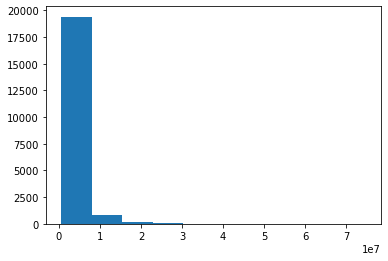

In [201]:
plt.hist(y_train)

(array([1104., 5511., 6868., 3803., 1699.,  894.,  412.,  178.,   64.,
          41.]),
 array([13.22960392, 13.71967638, 14.20974883, 14.69982128, 15.18989374,
        15.67996619, 16.17003864, 16.6601111 , 17.15018355, 17.640256  ,
        18.13032846]),
 <BarContainer object of 10 artists>)

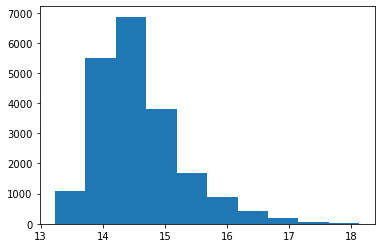

In [188]:
y_train_log = np.log1p(y_train)
plt.hist(y_train_log)

### Ridge Regression

#### Use y

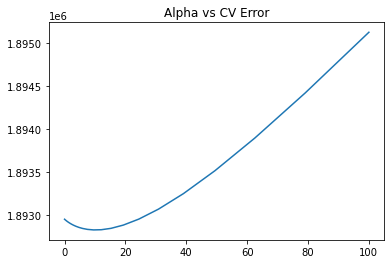

In [202]:
alphas = np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')
plt.show()

#### Use log y

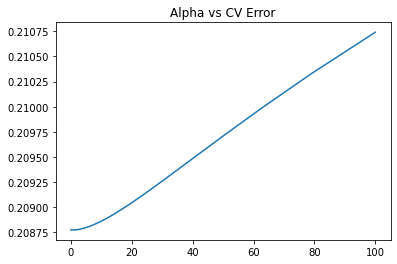

In [203]:
alphas = np.logspace(-3,2,50)
test_scores = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train_log,cv = 10,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
    
plt.plot(alphas,test_scores)
plt.title('Alpha vs CV Error')
plt.show()

### Random Forest

#### Use y

Text(0.5, 1.0, 'Max Features vs CV Error')

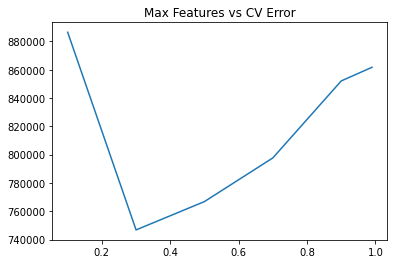

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []

for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators = 200,max_features = max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


import matplotlib.pyplot as plt
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')

#### Use log y

Text(0.5, 1.0, 'Max Features vs CV Error')

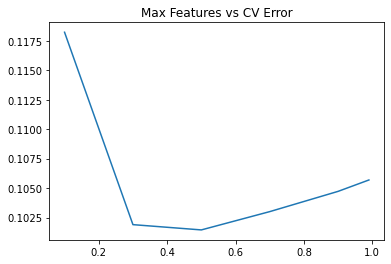

In [205]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

max_features = [.1,.3,.5,.7,.9,.99]
test_scores = []

for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators = 200,max_features = max_feat)
    test_score = np.sqrt(-cross_val_score(clf,X_train,y_train_log,cv = 5,scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


import matplotlib.pyplot as plt
plt.plot(max_features,test_scores)
plt.title('Max Features vs CV Error')

## 2.3 Training evaluation

In [206]:
from sklearn.metrics import mean_squared_error

In [209]:
model = Ridge(10)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

rmse=np.sqrt(mean_squared_error(y_pred,y_test))

print('Evaluation on Ridge (use y):')
print('R2:', score)
print('MSE:', rmse)

Evaluation on Ridge (use y):
R2: 0.8291702847264812
MSE: 1775864.2038998352


In [227]:
model = Ridge(1)
 
model.fit(X_train, y_train_log)
y_ = model.predict(X_test)
y_pred=np.expm1(y_)
score = model.score(X_test,np.log1p(y_test))

rmse=np.sqrt(mean_squared_error(y_pred,y_test))

print('Evaluation on Ridge (use log_y):')
print('R2:', score)
print('MSE:', rmse)

Evaluation on Ridge (use log_y):
R2: 0.9112920733596345
MSE: 3096753.622736283


In [222]:
model = RandomForestRegressor(n_estimators= 200,max_features=.3)
 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

rmse=np.sqrt(mean_squared_error(y_pred,y_test))

print('Evaluation on RF (use y):')
print('R2:', score)
print('MSE:', rmse)

Evaluation on RF (use y):
R2: 0.967676200885179
MSE: 772483.5577281326


In [228]:
model = RandomForestRegressor(n_estimators= 200,max_features=.5)
 
model.fit(X_train, y_train_log)
y_ = model.predict(X_test)
y_pred=np.expm1(y_)
score = model.score(X_test,np.log1p(y_test))

rmse=np.sqrt(mean_squared_error(y_pred,y_test))

print('Evaluation on RF (use log_y):')
print('R2:', score)
print('MSE:', rmse)

Evaluation on RF (use log_y):
R2: 0.9810378829538342
MSE: 898569.7126512462


# 3. Inference

In [213]:
test = pd.read_csv('dataset/test_yutong.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7500 non-null   int64  
 1   listing_id          7500 non-null   int64  
 2   name                7500 non-null   object 
 3   street              7500 non-null   object 
 4   type                7500 non-null   object 
 5   bathrooms           7163 non-null   float64
 6   district            7500 non-null   int64  
 7   region              7500 non-null   object 
 8   planning_area       7500 non-null   object 
 9   subszone            7500 non-null   object 
 10  built_year          7452 non-null   float64
 11  no_of_units         7174 non-null   float64
 12  area_size           7500 non-null   float64
 13  date_listed         7500 non-null   object 
 14  bedrooms            7500 non-null   int64  
 15  tenure_remains      7500 non-null   int64  
 16  tenure

In [214]:
# drop attr
df_test=test.copy()
df_test = df_test.drop(labels=meaningless_attrs, axis=1)

# one-hot encoding
for i in range(len(cat_cols)):
    df_test = pd.merge(df_test, pd.get_dummies(df_test[cat_cols[i]], prefix=cat_cols[i]), on=df_test.index)
    df_test.drop(columns=['key_0', cat_cols[i]], inplace=True)

# int to float
df_test=df_test.astype(float)

# fill nan
mean_cols = df_test.mean()
df_test = df_test.fillna(mean_cols)


df_stand_part = pd.DataFrame(StandardScaler().fit_transform(df_test[standard_vars]), columns=standard_vars,index=df_test.index)
df_test = pd.concat([df_test[non_standard_vars], df_stand_part], axis=1)

In [218]:
test_X = df_test.values
test_X.shape

(7500, 59)

In [230]:
model = RandomForestRegressor(n_estimators= 200,max_features=.5)
 
model.fit(train_X, np.log1p(train_y))
y_ = model.predict(test_X)
y_pred=np.expm1(y_)

In [231]:
y_pred

array([1985420.99411652, 2564274.37212423,  735537.34606171, ...,
       1640290.88988361,  916457.21898166, 7211156.93515654])

In [232]:
# save the prediction results
submission_df = pd.DataFrame(data = {'Id':test.index,'Price':y_pred})
submission_df.to_csv('submission.csv',columns = ['Id','Price'],index = False)
